In [1]:
import json
import pandas as pd

In [2]:
with open('reviews.json') as f:
    reviews = f.read().strip().split("\n")
    

In [3]:
len(reviews)

803

In [4]:
review_list = pd.DataFrame(columns = json.loads(reviews[0]))

In [5]:
for review in reviews:
    one = json.loads(review)
    review_list.loc[-1] = [one['name'],one['date'],one['text'],one['score']]
    review_list.index = review_list.index + 1
    review_list = review_list.sort_index()

In [6]:
review_list

,name,date,text,score
0,Heather,2018-04-08 00:00:00,When I click the button it shines brightly,5.0
1,smokey,2018-04-08 00:00:00,i have to buy batteries china junk,1.0
2,Susan,2018-04-07 00:00:00,Arrived on time and product is as depicted. G...,5.0
3,JiaHui Chen,2018-04-07 00:00:00,"This is a small iron flashlight, it is very co...",5.0
4,Amazon Customer,2018-04-07 00:00:00,Awesome flashlight for the price!,5.0
5,Atlanta Jake,2018-04-07 00:00:00,Got these two flashlights on sale and well wor...,5.0
6,An N.,2018-04-07 00:00:00,Decent enough light. But I hated the fact that...,2.0
7,MW,2018-04-06 00:00:00,It’s tiny cute flashlight. As of luminous flu...,5.0
8,Nicholas Kisling,2018-04-06 00:00:00,Better than I was expecting for the price and ...,4.0
9,Jing Zhang,2018-04-06 00:00:00,This is one of the must haves for each and eve...,5.0


In [34]:
#detect fake reviews
review_list['text length'] = review_list['text'].apply(lambda x: len(x.split()))
review_list['name length'] = review_list['name'].apply(lambda x: len(x.split()))

In [35]:
full_star_review = review_list[(review_list.score == 5.0)]

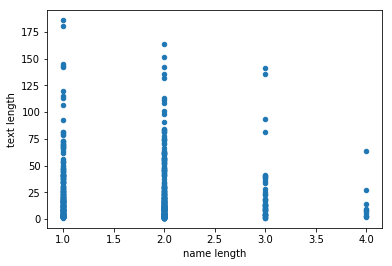

In [36]:
full_star_review.plot.scatter(x='name length', y='text length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3FA2E5048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A3FB40BD30>]], dtype=object)

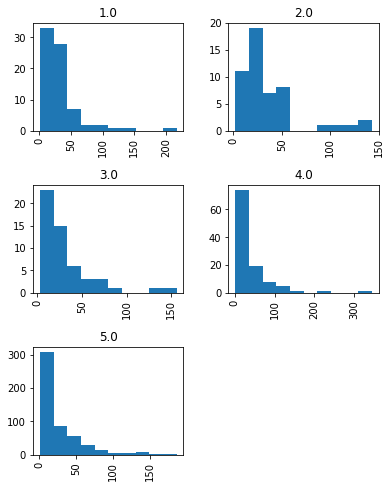

In [37]:
review_list['text length'].hist(by = review_list['score'], figsize = (6,8))

In [42]:
pd.value_counts(review_list['score'])

5.0    516
4.0    109
1.0     75
3.0     53
2.0     50
Name: score, dtype: int64

In [44]:
review_list['text length'].describe()

count    803.000000
mean      28.926526
std       34.411523
min        1.000000
25%        7.000000
50%       17.000000
75%       38.000000
max      345.000000
Name: text length, dtype: float64

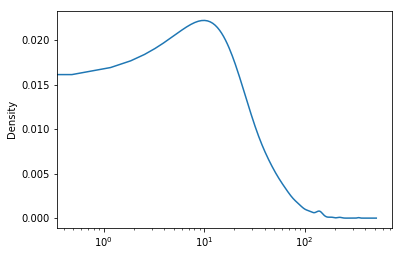

In [45]:
review_list['text length'].plot(kind='kde', logx=True)

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

In [51]:
[[1,2,3]] * 3

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [52]:
def save_ranking(first, second, third=None, fourth=None):
    rank = {}
    rank[1], rank[2] = first, second
    rank[3] = third if third is not None else 'Nobody'
    rank[4] = fourth if fourth is not None else 'Nobody'
    print(rank)    

In [53]:
save_ranking('ming', 'alice')

{1: 'ming', 2: 'alice', 3: 'Nobody', 4: 'Nobody'}


In [54]:
save_ranking('alice', 'ming', third='mike')

{1: 'alice', 2: 'ming', 3: 'mike', 4: 'Nobody'}


In [55]:
def save_ranking(*args):
    print(args) 
save_ranking('ming', 'alice', 'tom', 'wilson', 'roy')

('ming', 'alice', 'tom', 'wilson', 'roy')


In [56]:
def save_ranking(**kwargs):
    print(kwargs)
save_ranking(first='ming', second='alice', fourth='wilson', third='tom', fifth='roy')

{'first': 'ming', 'second': 'alice', 'fourth': 'wilson', 'third': 'tom', 'fifth': 'roy'}


In [57]:
def save_ranking(*args, **kwargs):
    print(args)     
    print(kwargs)
save_ranking('ming', 'alice', 'tom', fourth='wilson', fifth='roy')  

('ming', 'alice', 'tom')
{'fourth': 'wilson', 'fifth': 'roy'}
